### Actividad 4 - Punto 1 - Estimacion del minimo usando gradiente descendiente

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sympy import *

In [2]:
# funcion para el calculo del gradiente descendiente
def gradientDescent(gradiente, punto_inicio, t_paso = .085, precision = .01, max_iter = 3000, initError = 10):
    # configuracion inicial
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])

    # inicio de las iteraciones
    
    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1 # se incrementa el contador
        prevX = currX.copy() # registra el ultimo valor de error
        
        # Gradient descent equation
        currX -= t_paso * np.array(gradiente(x,y)) # New X = (last) minus (step size * function gradient(last)).
        x,y = currX[0].copy(), currX[1].copy() # Update X.
        # Gradient descent equation
        
        error = currX - prevX # Error based on how much movement new X made based on gamma and gradient.
        iterCoords.append(np.hstack([x,y])) # Track X for plotting.
        
    return currIter, currX, np.vstack(iterCoords)

In [3]:
# Declaracion de la funcion  f(x,y) = 3x² + 2xy + 15x + 6y² - y
x, y = symbols("x y")
funcion = 3*x**2 + 2*x*y + 15*x + 6*y**2 - y
funcion

3*x**2 + 2*x*y + 15*x + 6*y**2 - y

In [4]:
# expresion transformada en funcion
f = lambdify('x,y',funcion)

In [5]:
# se saca una derivada parcial por cada variable x, y
# y el gradiente es un vector apuntando a cada funcion de la derivada parcial de cada variable

# derivada parcial de la funcion respecto a x
der_f_1x = funcion.diff(x)
# transformacion de la expresion de la der en funcion
f_der_f_1x = lambdify('x,y',der_f_1x)

# derivada parcial de la funcion respecto a y
der_f_1y = funcion.diff(y)
# transformacion de la expresion de la der en funcion
f_der_f_1y = lambdify('x,y',der_f_1y)

f_gradiente = [der_f_1x,der_f_1y]

gradiente = lambdify('x,y',f_gradiente)

In [6]:
punto_inicio = np.vstack([-2,3])
punto_inicio

array([[-2],
       [ 3]])

#### Grafica de la funcion y el punto de inicio

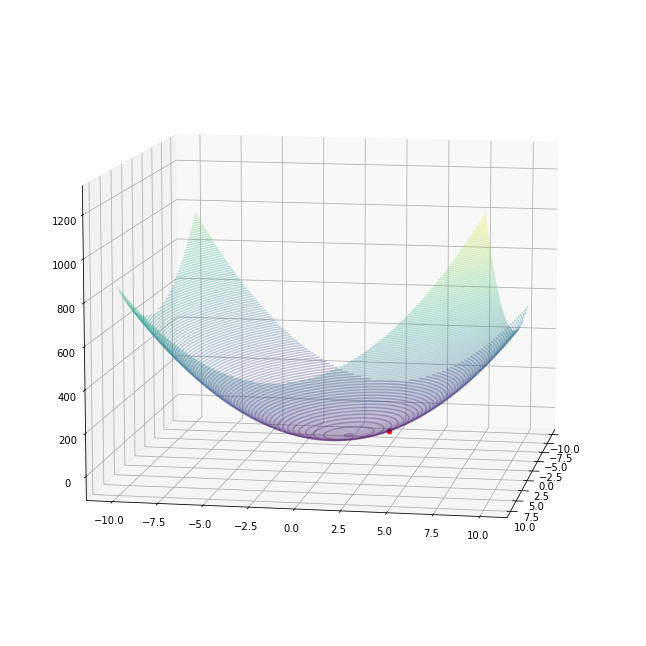

In [7]:
# gereramos un conjunto de datos a partir de la funcion
l = 10
n = 150
linspace = np.linspace(-l,l,n) 

X,Y = np.meshgrid(linspace,linspace)

Z = f(X,Y)


fig = plt.figure(figsize = (18,18), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .3)


ax.scatter3D(punto_inicio[0], punto_inicio[1],f(*punto_inicio), color="red")
ax.view_init(10,10)

#### Estimacion del minimo usando el gradiente descendiente

In [8]:
# Calculo del gradiente descendiente
pasos_totales, coordenada_final, coordenadas_intermedias = gradientDescent(gradiente,punto_inicio, t_paso=0.085)
print('Pasos Totales: ', pasos_totales)
print('Coordenadas del minimo:')
print(coordenada_final)
coordenadas_intermedias[:5]

Pasos Totales:  4
Coordenadas del minimo:
[[-2.68208632]
 [ 0.53118189]]


array([[-2.        ,  3.        ],
       [-2.765     ,  0.365     ],
       [-2.6919    ,  0.54775   ],
       [-2.6871485 ,  0.531668  ],
       [-2.68208632,  0.53118189]])

#### Grafica de la funcion y del gradiente descendiente

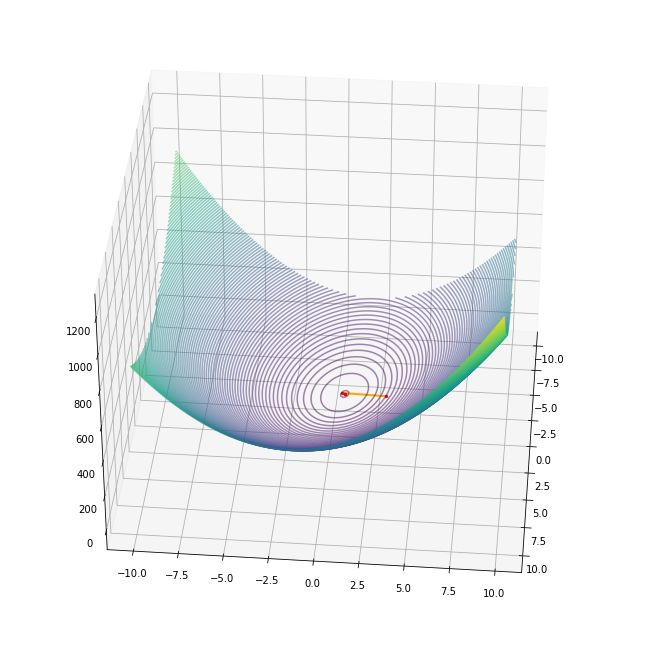

In [9]:


fig = plt.figure(figsize = (18,18), tight_layout = True)

ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
for i in coordenadas_intermedias:
    pointTemp = i
    ax.scatter3D(pointTemp[0],pointTemp[1],f(*pointTemp),c = "red", s = 5)

ax.plot(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1],f(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1]), c = "orange", lw = 2)
ax.view_init(35, 5);

